# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Jian Aurelia
- **Email:** 18222001@std.stei.itb.ac.id
- **ID Dicoding:** MC002D5X2442

## Menentukan Pertanyaan Bisnis

- Bagaimana Tren Kualitas Udara Berubah Seiring Waktu di Berbagai Kota?
    - Tujuan: Mengidentifikasi periode dengan tingkat polusi tertinggi untuk mitigasi lebih lanjut
- Bagaimana Kualitas Udara di Setiap Kota Memengaruhi Risiko Kesehatan Penduduk?
    - Tujuan: Mengetahui ambang polusi yang memungkinkan kita memprediksi risiko kesehatan dan merancang kebijakan kesehatan masyarakat.

## Import Semua Packages/Library yang Digunakan

In [181]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import glob
import os
import matplotlib.cm as cm
import matplotlib.colors as mcolors

## Data Wrangling

***Data wrangling*** merupakan sebuah proses atau kumpulan kegiatan yang meliputi pengumpulan data (Gathering data), penilaian data (Assessing data), serta pembersihan data (Cleaning data) sebelum data digunakan dalam proses analisis data.

**Tujuan:**
> Membersihkan, merapikan, dan mengubah data mentah menjadi format yang lebih berguna dan siap untuk analisis.

### Gathering Data

**Definisi:** Proses mengumpulkan data dari berbagai sumber untuk digunakan dalam analisis, penelitian, atau pengambilan keputusan.

Analisi ini menggunakan ***Secondary Data*** yang sudah disiapkan oleh panitia.

**Tujuan:**
- Mendapatkan data yang relevan untuk analisis.
- Menyediakan informasi berkualitas yang akurat dan dapat dipercaya.
- Memastikan kelengkapan data sebelum diproses lebih lanjut (wrangling, preprocessing).

In [182]:
folder_path = "Data/PRSA_Data_20130301-20*"  # Sesuaikan dengan lokasi file Anda

# Ambil semua file CSV dalam folder
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))
dataframes = {}

for file in csv_files:
    file_name = os.path.basename(file).replace(".csv", "")  # Ambil nama file tanpa ekstensi
    city_name = file_name.split("_")[2]  # Ekstraksi nama kota dari nama file
    
    df = pd.read_csv(file)  # Baca file CSV
    dataframes[city_name] = df  # Simpan dataset ke dictionary

# ================== TAMPILKAN SEMUA DATA KOTA ==================
for city, df in dataframes.items():
    print(f"\n===== {city} =====")
    display(df.head())  # Menampilkan 5 baris pertama untuk setiap kota



===== Aotizhongxin =====


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin



===== Changping =====


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping



===== Dingling =====


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling



===== Dongsi =====


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi



===== Guanyuan =====


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan



===== Gucheng =====


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng



===== Huairou =====


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou



===== Nongzhanguan =====


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,5.0,14.0,4.0,12.0,200.0,85.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Nongzhanguan
1,2,2013,3,1,1,8.0,12.0,6.0,14.0,200.0,84.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Nongzhanguan
2,3,2013,3,1,2,3.0,6.0,5.0,14.0,200.0,83.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Nongzhanguan
3,4,2013,3,1,3,5.0,5.0,5.0,14.0,200.0,84.0,-1.4,1026.2,-25.5,0.0,N,4.9,Nongzhanguan
4,5,2013,3,1,4,5.0,5.0,6.0,21.0,200.0,77.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Nongzhanguan



===== Shunyi =====


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi



===== Tiantan =====


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan



===== Wanliu =====


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu



===== Wanshouxigong =====


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,6.0,17.0,200.0,62.0,0.3,1021.9,-19.0,0.0,WNW,2.0,Wanshouxigong
1,2,2013,3,1,1,11.0,11.0,7.0,14.0,200.0,66.0,-0.1,1022.4,-19.3,0.0,WNW,4.4,Wanshouxigong
2,3,2013,3,1,2,8.0,8.0,NaN,16.0,200.0,59.0,-0.6,1022.6,-19.7,0.0,WNW,4.7,Wanshouxigong
3,4,2013,3,1,3,8.0,8.0,3.0,16.0,NaN,NaN,-0.7,1023.5,-20.9,0.0,NW,2.6,Wanshouxigong
4,5,2013,3,1,4,8.0,8.0,3.0,NaN,300.0,36.0,-0.9,1024.1,-21.7,0.0,WNW,2.5,Wanshouxigong


**Insight:**
- Terdapat ***12 tabel*** yang kemungkinan besar merupakan ***lokasi pemantauan polusi udara di Beijing, China***.
- Kolom yang ada dalam dataset menunjukkan parameter kualitas udara dan cuaca.
    - PM2.5, PM10, SO2, NO2, CO, O3 → Konsentrasi polutan udara.
    - TEMP, PRES, DEWP, RAIN, WSPM → Parameter cuaca seperti suhu, tekanan udara, titik embun, curah hujan, dan kecepatan angin.
    - wd → Arah angin.
    - station → Nama stasiun pemantauan.

### Assessing Data
**Definisi:** Proses evaluasi dan pemeriksaan awal terhadap dataset untuk memahami kualitas, struktur, dan potensi masalah dalam data sebelum dilakukan analisis lebih lanjut.

**Tujuan:** Menilai kualitas dan struktur dari sebuah data

In [183]:
for name, df in dataframes.items():
    print("="*50)
    print(f"\033[1m{name}\033[0m")
    print("="*50)
    
    # Informasi DataFrame
    print("\n🔍 Data Info:")
    df.info()
    
    # Cek missing values
    print("\n🔎 Missing Values:")
    print(df.isna().sum())
    
    # Cek duplikasi
    print("\n🛑 Duplicate Rows:")
    print(f"Jumlah duplikasi: {df.duplicated().sum()}")
    
    # Statistik Deskriptif
    print("\n📈 Descriptive Statistics:")
    print(df.describe())
    
    print("\n" + "="*50 + "\n")


Aotizhongxin

🔍 Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB

🔎 Missing Values:
No            0
year  

**Insight:**
1. Seluruh dataset memiliki karakteristik yang sama sehingga bisa diperlakukan sama pada tahap *cleaning data*

2. ***Missing Values pada Data Polutan Udara***
    - Data konsentrasi polutan udara (PM2.5, PM10, SO2, NO2, CO, O3) memiliki missing values yang cukup signifikan sehingga mampu menyebabkan distorsi dalam analisis.
    - **Penanganan:** Strategi imputasi lanjutan, seperti interpolasi linier karena memiliki nilai missing value yang cukup banyak.

3. ***Missing Values pada Data Parameter Cuaca***
    - Beberapa parameter cuaca (TEMP, PRES, DEWP, RAIN, WSPM) juga memiliki missing values, tetapi jumlahnya tidak signifikan dibandingkan data polutan.
    - **Penanganan:** Mengingat pola cuaca bervariasi sepanjang tahun, imputasi menggunakan rata-rata per bulan (month) adalah metode yang lebih tepat dibandingkan imputasi dengan mean global.

4. ***Kehadiran Outliers pada Konsentrasi Polutan Udara***
    - Analisis statistik `describe()` menunjukkan adanya outliers yang signifikan pada polutan udara.
    - Outlier ini bisa terjadi karena:
        - Episode polusi ekstrem, seperti musim kabut asap atau pencemaran dari industri.
        - Kesalahan pencatatan sensor atau nilai anomali yang tidak representatif.
    - **Penanganan:** Metode seperti capping dengan 95th/98th percentile agar data tetap representatif tanpa distorsi akibat nilai ekstrem namun tetap menggambarkan nilai yang tinggi dan mempertahankan nilai minimum karena outliers berada pada nilai maksimum nya.

5. ***Distribusi Musiman pada Polusi Udara dan Cuaca***
    - Distribusi data menunjukkan bahwa polusi udara dan parameter cuaca memiliki pola musiman, sehingga imputasi dan outlier handling sebaiknya dilakukan secara dinamis berdasarkan bulan (month).
    - Polusi udara kemungkinan lebih tinggi pada bulan-bulan tertentu karena faktor cuaca (inversi suhu, kelembaban rendah) atau aktivitas manusia (pemanasan di musim dingin, polusi kendaraan).

### Cleaning Data
**Definisi:** menemukan masalah (missing value, outlier, dll.) yang terdapat di dalam sebuah data, masalah tersebut harus dibersihkan sebelum masuk tahap analisis data

Berikut adalah visualisasi untuk menggambarkan nilai `outliers` dari salah satu dataset sebagai perwakilan dari seluruh dataset.

In [184]:
def plot_boxplots(df, columns_per_row=3):
    numeric_cols = df.select_dtypes(include=["number"]).columns 
    num_cols = len(numeric_cols)  
    
    rows = (num_cols // columns_per_row) + (num_cols % columns_per_row > 0)
    
    fig, axes = plt.subplots(rows, columns_per_row, figsize=(columns_per_row * 5, rows * 5))
    axes = axes.flatten()  

    for i, col in enumerate(numeric_cols):
        sns.boxplot(y=df[col], ax=axes[i]) 
        axes[i].set_title(f"Boxplot: {col}") 

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


c:\Users\Jihan Aurelia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\Jihan Aurelia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\Jihan Aurelia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\Jihan Aurelia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be 

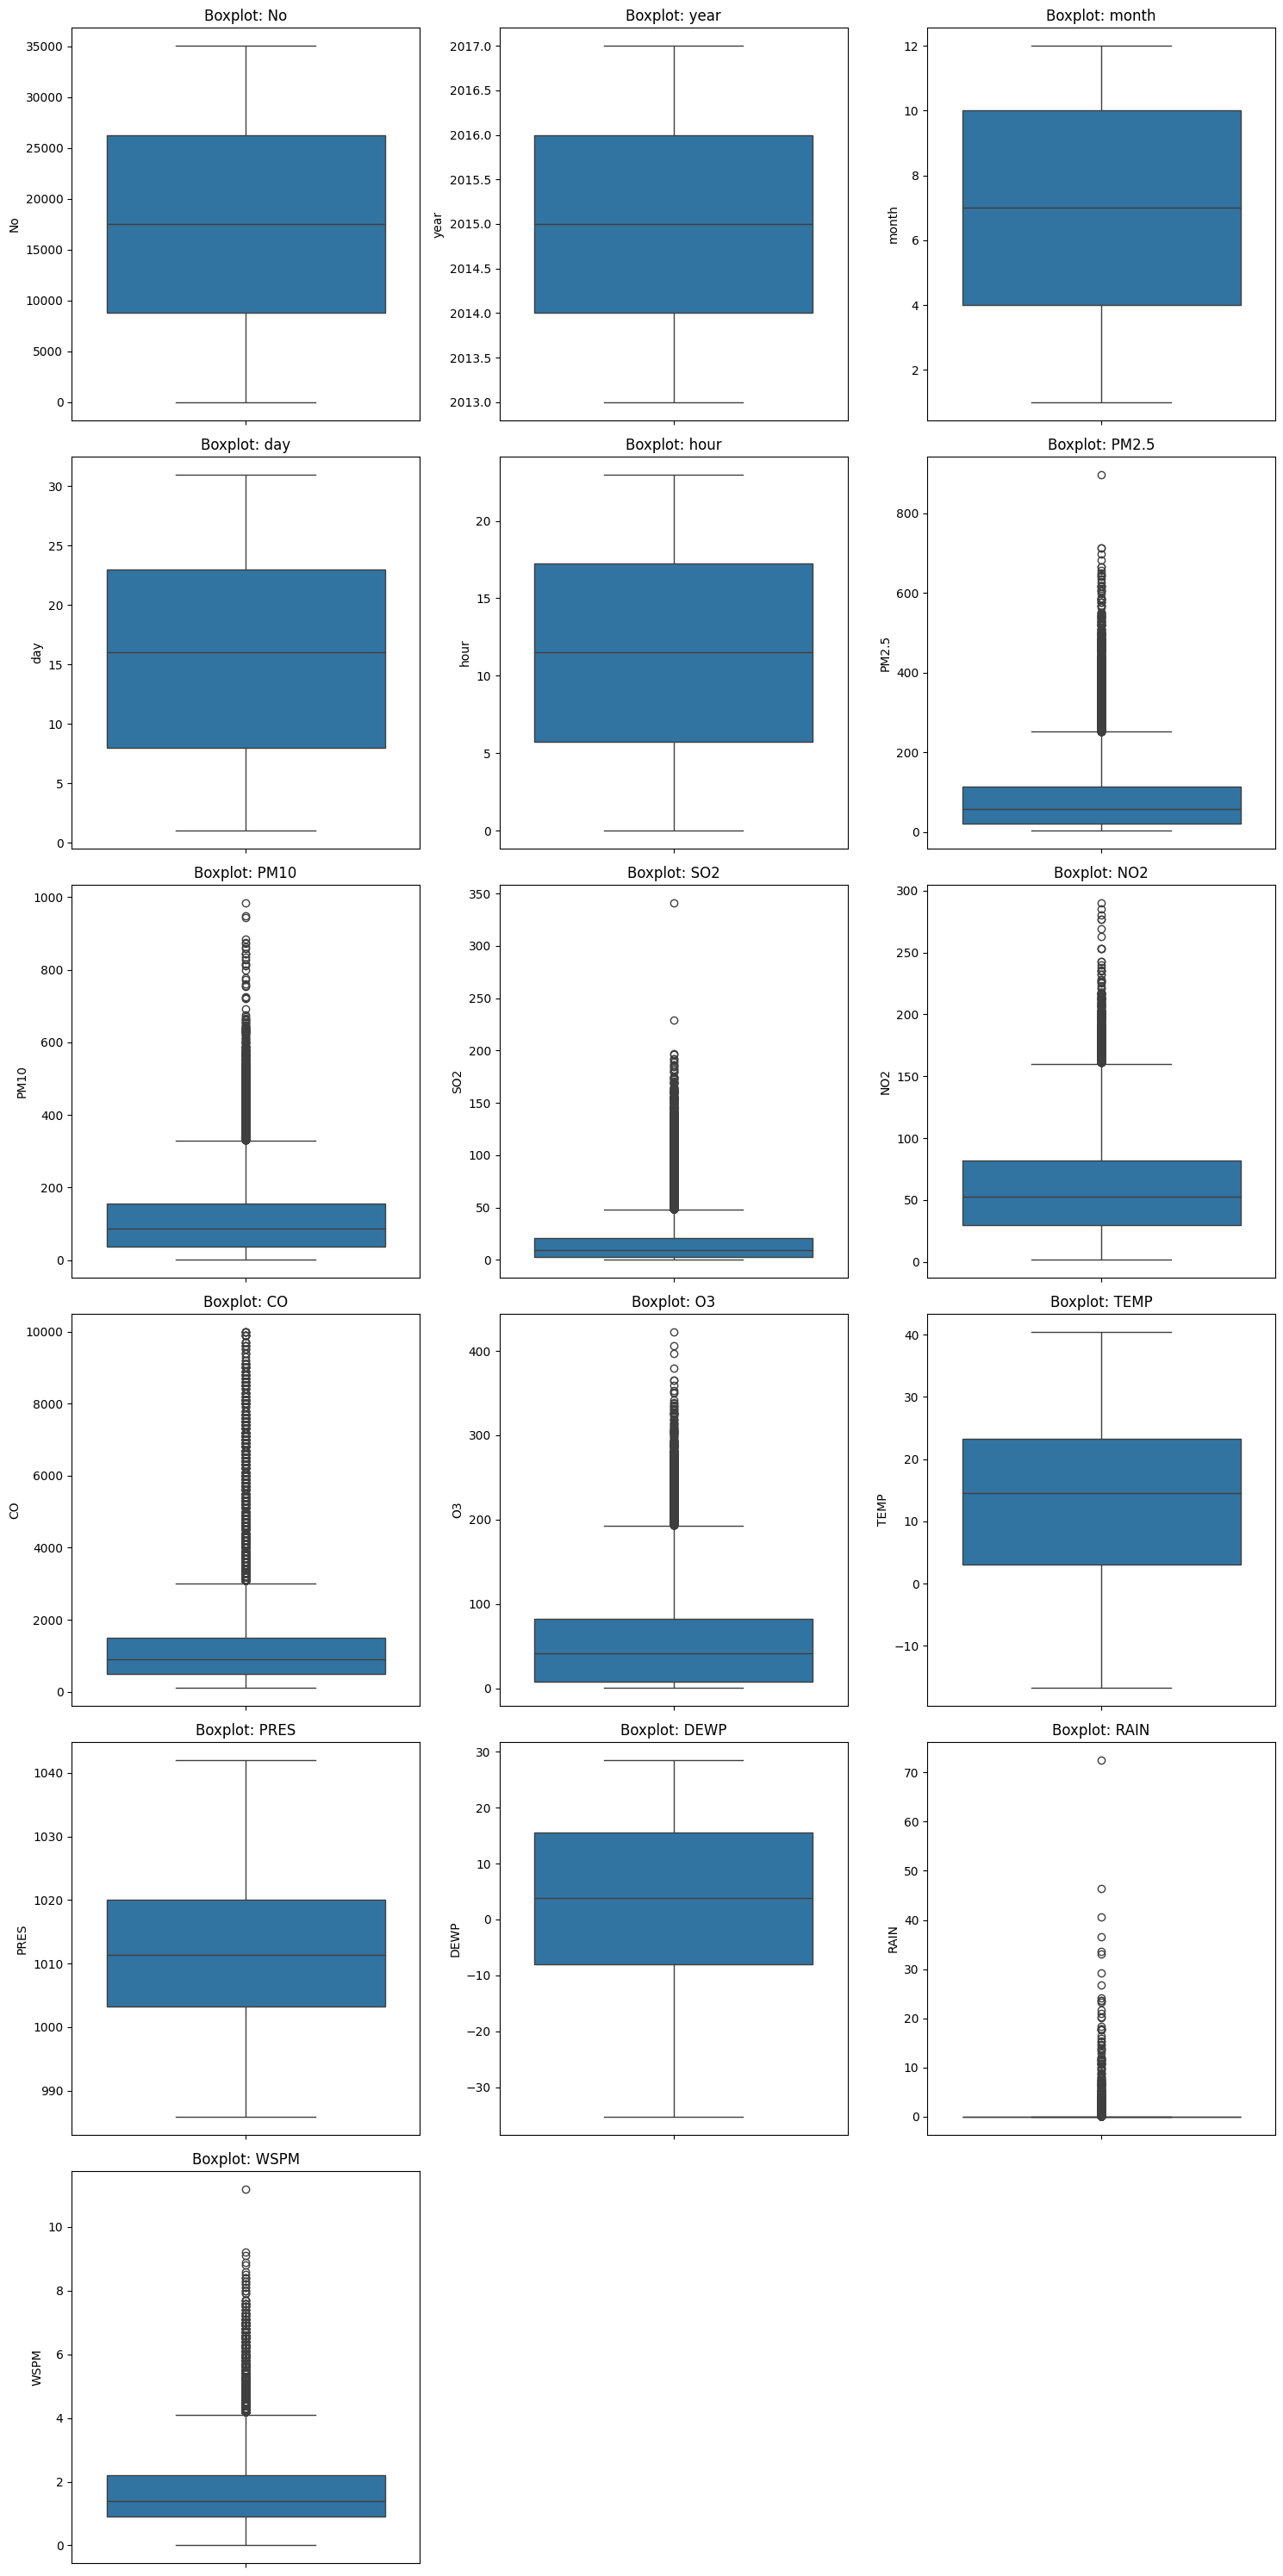

In [185]:
plot_boxplots(dataframes["Aotizhongxin"])

In [186]:
# Fungsi untuk menangani duplikasi
def remove_duplicates(df):
    print(f"Jumlah duplikasi sebelum: {df.duplicated().sum()}")
    df.drop_duplicates(inplace=True)
    print(f"Jumlah duplikasi setelah: {df.duplicated().sum()}\n")
    return df

# Fungsi untuk imputasi missing values berdasarkan bulan
def impute_missing_values(df):
    # interpolasi linier
    for col in ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]:
        df[col] = df[col].interpolate(method='linear')

    # berdasarkan rata-rata bulan
    for col in ["TEMP", "PRES", "DEWP", "RAIN", "WSPM"]:
        df[col] = df.groupby("month")[col].transform(lambda x: x.fillna(x.mean()))

    # mode per bulan
    if "wd" in df.columns:
        df["wd"] = df.groupby("month")["wd"].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown"))

    print("Missing values setelah imputasi:")
    print(df.isna().sum())
    print("\n")
    return df

# Fungsi untuk capping hanya pada upper percentile untuk data konsentrasi polutan udara
def cap_upper_outliers(df, upper_percentile_mapping):
    for col, upper_p in upper_percentile_mapping.items():
        if col in df.columns: 
            upper_limit = df[col].quantile(upper_p)
            df[col] = df[col].clip(upper=upper_limit)
    return df

# Fungsi untuk capping hanya pada upper percentile untuk atribut RAIN di bulan Juli
def cap_rain_july(df, percentile=0.99):
    rain_upper_limit_july = df.loc[df["month"] == 7, "RAIN"].quantile(percentile)
    df.loc[(df["month"] == 7) & (df["RAIN"] > rain_upper_limit_july), "RAIN"] = rain_upper_limit_july
    return df

# Membersihkan dataset
def clean_dataset(df):
    df = remove_duplicates(df)
    df = impute_missing_values(df)
    
    # Capping polutan udara
    upper_percentile_mapping = {
        "PM2.5": 0.95,
        "PM10": 0.96,
        "SO2": 0.91,
        "NO2": 0.98,
        "CO": 0.92,
        "O3": 0.96
    }
    df = cap_upper_outliers(df, upper_percentile_mapping)
    df = cap_rain_july(df)
    
    return df

for name, df in dataframes.items():
    print("="*50)
    print(f"\033[1m{name}\033[0m")
    print("="*50)
    dataframes[name] = clean_dataset(df)

print("\nData cleaning selesai untuk semua dataset.")


Aotizhongxin
Jumlah duplikasi sebelum: 0
Jumlah duplikasi setelah: 0

Missing values setelah imputasi:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


Changping
Jumlah duplikasi sebelum: 0
Jumlah duplikasi setelah: 0

Missing values setelah imputasi:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


Dingling
Jumlah duplikasi sebelum: 0
Jumlah duplikasi setelah: 0

Missing values setelah imputasi:
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        2
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd   

Berikut adalah visualisasi untuk menggambarkan nilai `outliers` dari salah satu dataset yang sudah dibersihkan sebagai perwakilan dari seluruh dataset.

c:\Users\Jihan Aurelia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\Jihan Aurelia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\Jihan Aurelia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\Jihan Aurelia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be 

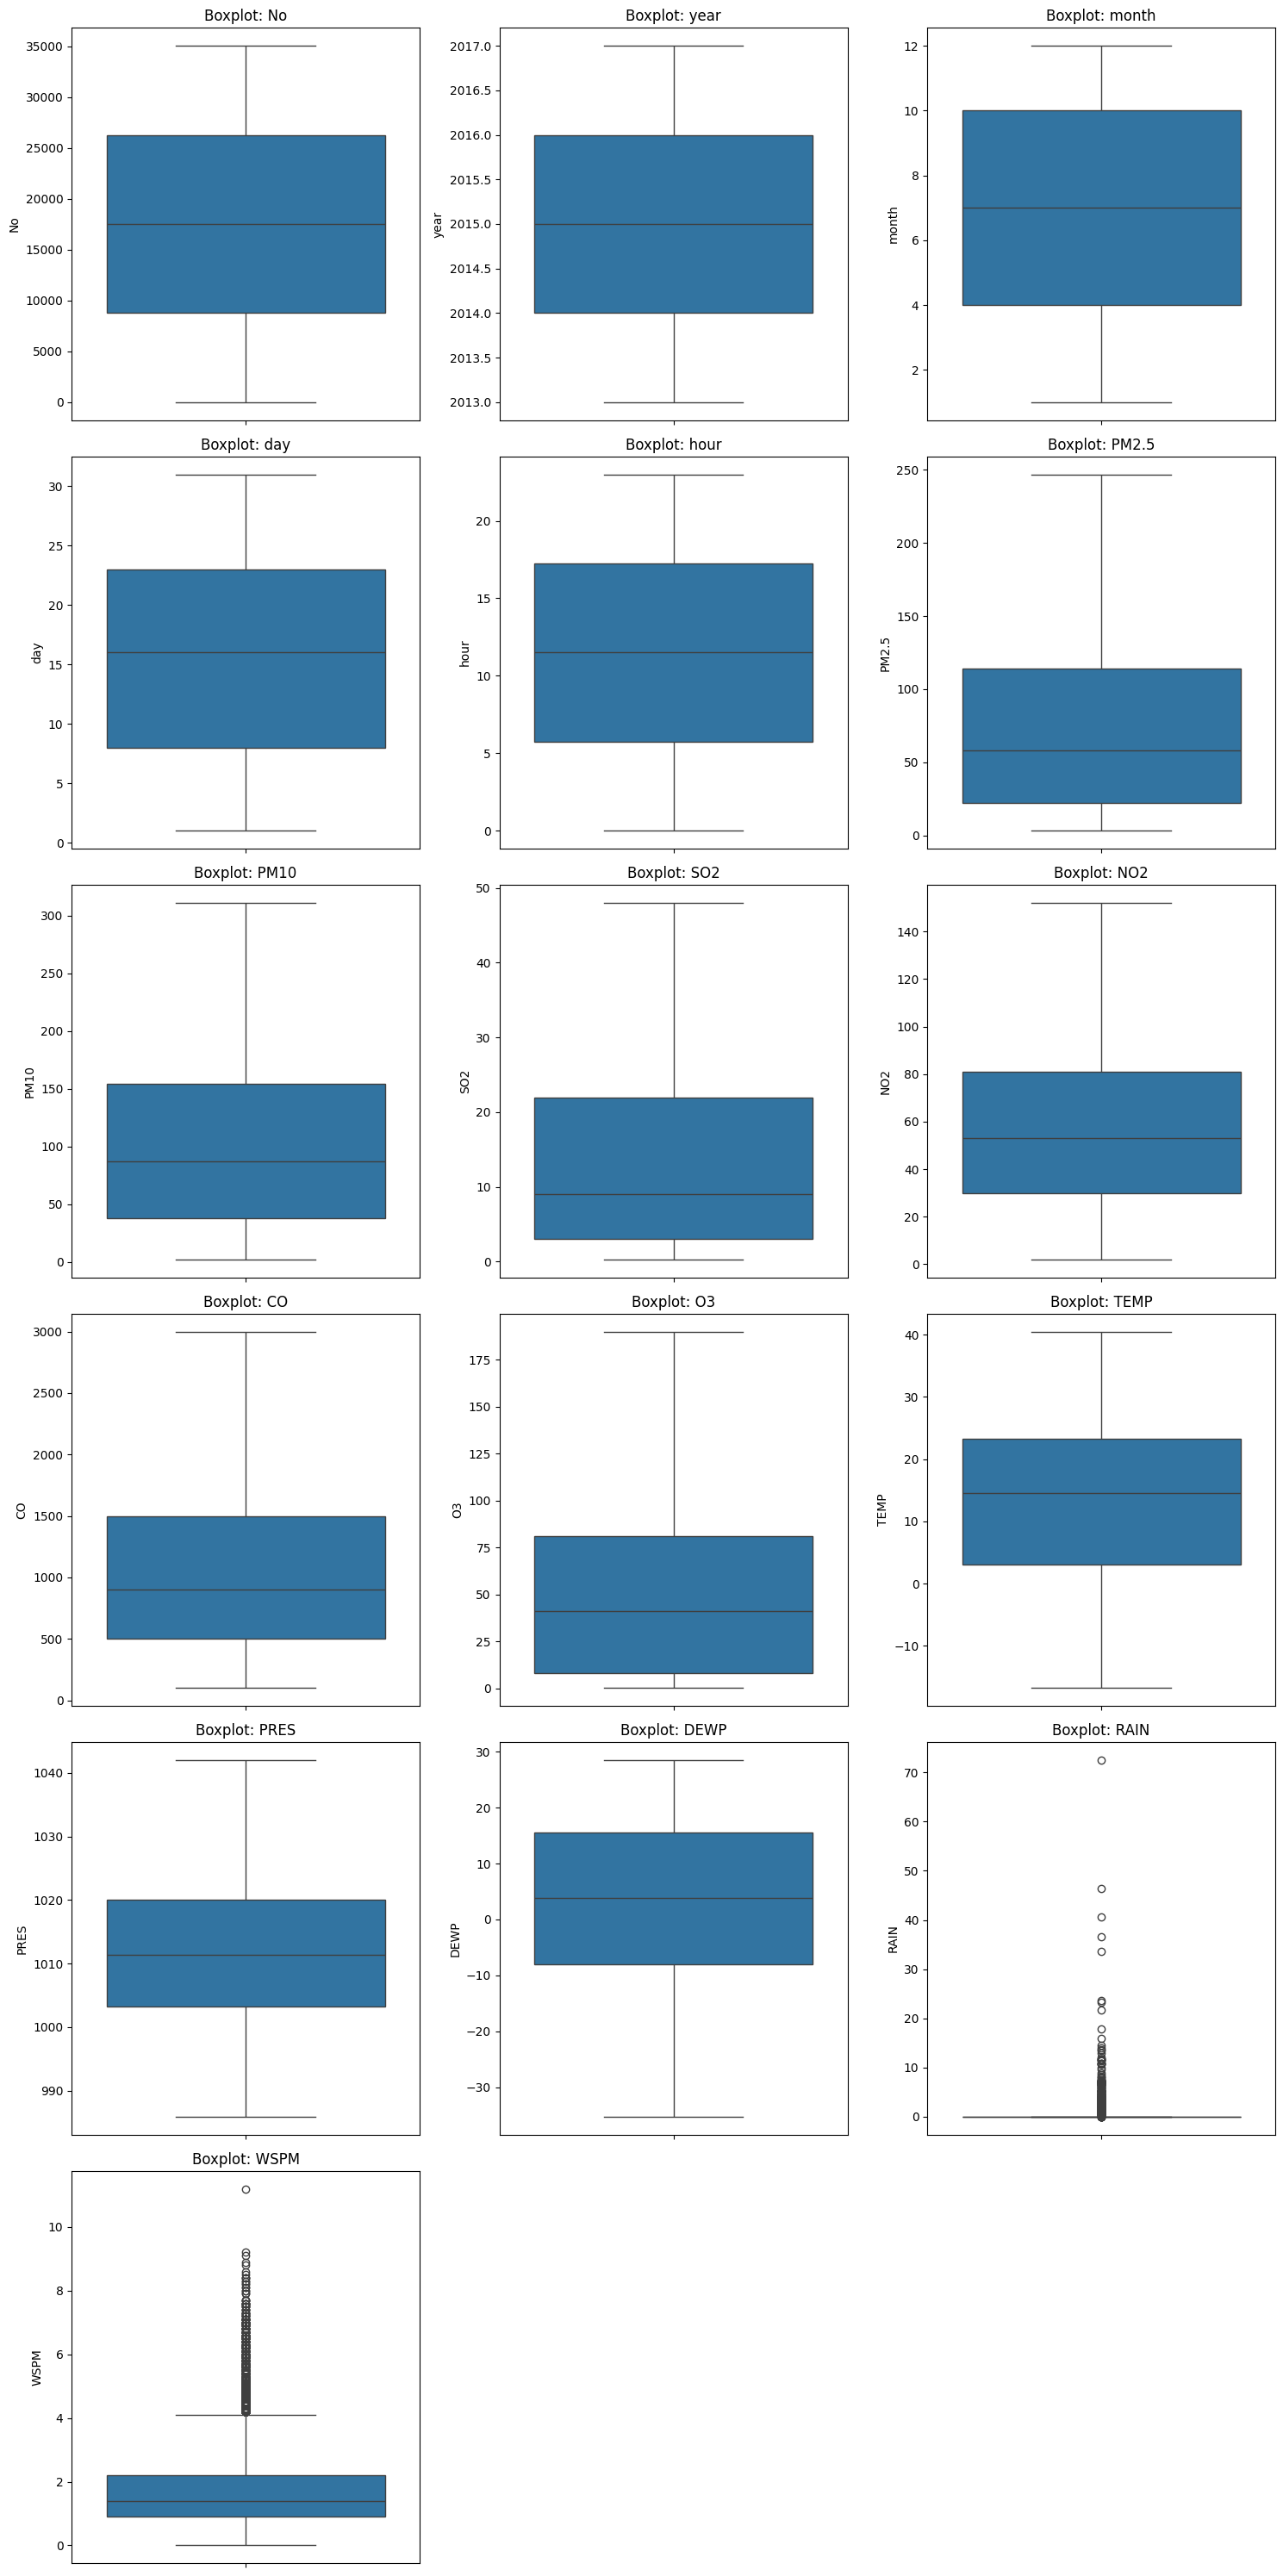

In [187]:
plot_boxplots(dataframes["Aotizhongxin"])


**Insight:**
- Menghapus duplikasi untuk mengoptimalkan performa analisis dan model machine learning, karena dataset menjadi lebih efisien tanpa data berulang yang tidak diperlukan.
- Penanganan *missing value* 
    - Imputasi nilai yang hilang dengan interpolasi pada data polusi udara (`PM2.5`, `PM10`, `SO2`, dll.) membantu mempertahankan tren alami data tanpa membuat bias yang besar.
    - Menggunakan rata-rata per bulan (month) untuk variabel cuaca (`TEMP`, `PRES`, `DEWP`, `RAIN`, `WSPM`) memungkinkan data tetap representatif terhadap musim atau pola tahunan yang ada.
    - Menggunakan nilai modus untuk data kategorikal `wd`
- Menangani Data Tidak Akurat (Outliers & Anomali)
    - melakukan *capping* untuk variabel polutan udara memastikan bahwa nilai ekstrem tidak mengganggu analisis tetapi tetap mempertahankan pola polusi yang valid. Nilai dari `upper_percentile_mapping` didapatkan dari beberapa kali percobaan hingga mendapatkan nilai yang sesuai.
    - Capping hanya pada bulan Juli untuk `RAIN` menghindari *over-correction* pada musim kemarau di bulan lain sehingga bisa menjaga pola musiman tetap wajar.

## Exploratory Data Analysis (EDA)

#### **Distribusi data**

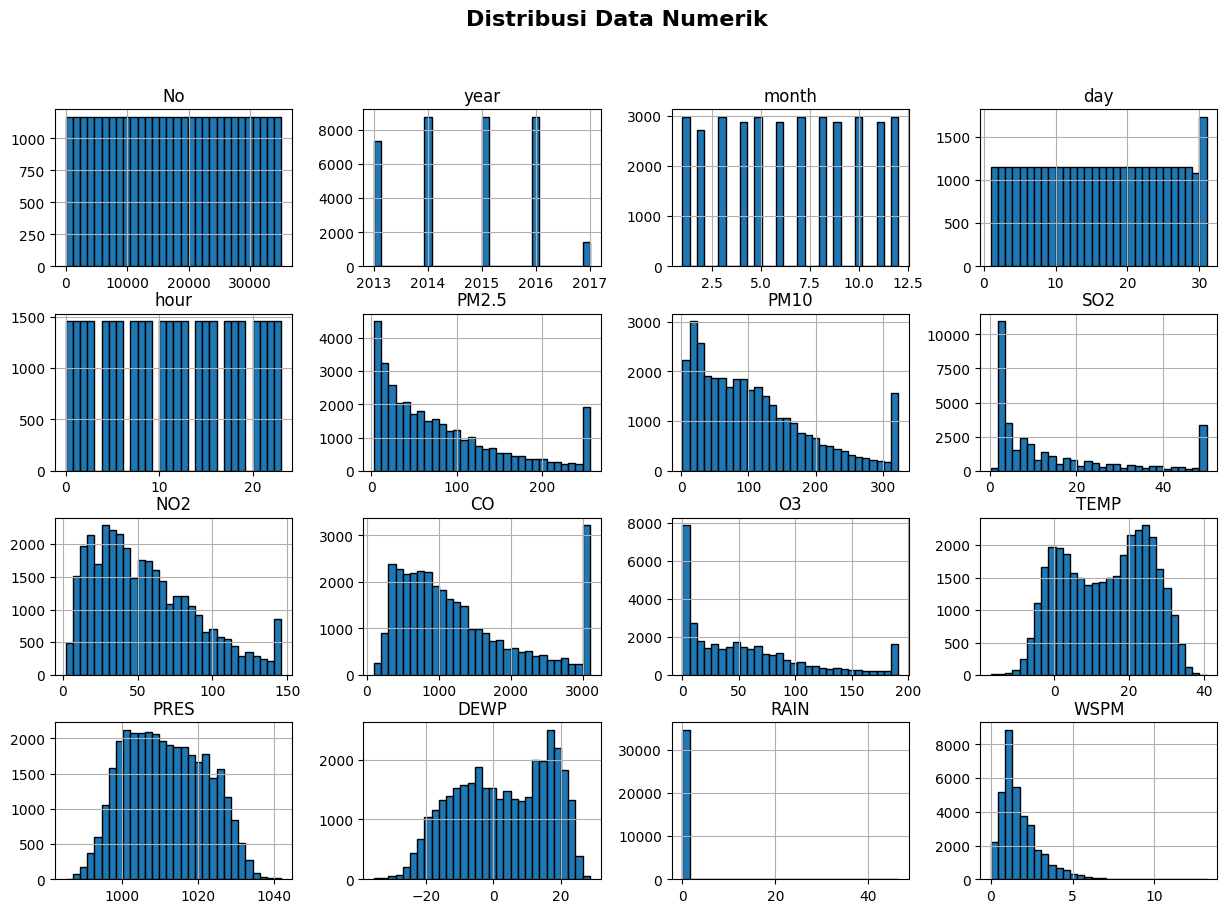

                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean      80.595879    108.461065     14.679484     55.061201   1253.455897   
std       70.986008     84.153764     15.659770    

In [211]:
numeric_cols = df.select_dtypes(include=['number']).columns

# Menampilkan histogram untuk distribusi data numerik
df[numeric_cols].hist(figsize=(15, 10), bins=30, edgecolor='black')
plt.suptitle("Distribusi Data Numerik", fontsize=16, fontweight="bold")
plt.show()

# Ringkasan statistik deskriptif
print(df[numeric_cols].describe())


terlihat bahwa seluruh atribut numerik memiliki tren pada masing-masing data, dengan detail sebagai berikut
1. Waktu
    - year: Data terdiri dari beberapa tahun (2013–2017) dengan jumlah observasi yang hampir merata per tahun.
    - month: Distribusi relatif merata, menunjukkan bahwa data dikumpulkan sepanjang tahun tanpa bias signifikan terhadap bulan tertentu.
    - day: Distribusi juga cukup merata, dengan sedikit peningkatan pada hari-hari tertentu, kemungkinan terkait jumlah observasi pada bulan dengan jumlah hari yang berbeda (misal Februari).
    - hour: Distribusi seragam menunjukkan bahwa data dikumpulkan secara kontinu selama 24 jam.

2. Polutan Udara
    - PM2.5 & PM10: Distribusi menunjukkan kemiringan ke kanan (right-skewed), yang berarti sebagian besar nilai berkisar di level rendah hingga sedang, namun terdapat beberapa nilai ekstrem yang sangat tinggi (indikasi pencemaran tinggi pada waktu tertentu).
    - SO2 & NO2: Distribusi juga menunjukkan kemiringan ke kanan, menandakan bahwa sebagian besar data memiliki konsentrasi SO2 dan NO2 yang rendah, tetapi ada kejadian dengan tingkat polutan yang sangat tinggi.
    - CO: Distribusi sangat mirip dengan PM2.5 dan PM10, menunjukkan pola pencemaran dengan konsentrasi rendah yang dominan, tetapi ada nilai tinggi yang bisa menjadi indikasi lonjakan pencemaran dari kendaraan atau industri.
    - O3: Distribusi juga right-skewed, menandakan bahwa sebagian besar waktu kadar O3 rendah, tetapi ada periode dengan peningkatan signifikan.

3. Meteorologi
    - TEMP (Suhu): Distribusi berbentuk bimodal, menunjukkan adanya dua musim dengan pola suhu berbeda (kemungkinan musim panas dan musim dingin).
    - PRES (Tekanan Udara): Distribusi menyerupai distribusi normal dengan puncak di sekitar nilai rata-rata, menunjukkan variasi tekanan udara yang cukup stabil.
    - DEWP (Dew Point / Titik Embun): Memiliki distribusi normal, yang berarti tingkat kelembapan bervariasi secara alami tanpa banyak outlier.
    - RAIN (Curah Hujan): Sangat right-skewed dengan sebagian besar nilai mendekati nol. Ini menunjukkan bahwa curah hujan hanya terjadi pada waktu tertentu dalam jumlah signifikan, sementara sebagian besar waktu tidak ada hujan.
    - WSPM (Kecepatan Angin): Distribusi right-skewed, yang menunjukkan sebagian besar waktu kecepatan angin rendah, tetapi ada beberapa kejadian angin kencang.

#### **Menjawab Pertanyaan dengan Tambahan Atribut Baru**

Berikut daya menambahkan atribut baru untuk memperkuat analisi. saya menghitung nilai ***Air Quality Index*** yang berguna untuk mengukur konsentrasi polutan udara untuk memperingatkan risiko kesehatan.

In [203]:
def calculate_aqi(concentration, breakpoints):
    """
    Menghitung AQI berdasarkan konsentrasi polutan dan breakpoint AQI.
    Parameters:
        - concentration: nilai konsentrasi polutan (dalam µg/m³ atau ppm).
        - breakpoints: daftar breakpoint AQI untuk polutan tertentu.
    Returns:
        - AQI yang sesuai dengan konsentrasi polutan.
    """
    for bp in breakpoints:
        C_low, C_high, I_low, I_high = bp
        if C_low <= concentration <= C_high:
            AQI = ((I_high - I_low) / (C_high - C_low)) * (concentration - C_low) + I_low
            return round(AQI)
    return None

# Breakpoint AQI
AQI_BREAKPOINTS = {
    "PM2.5": [
        [0.0, 12.0, 0, 50],
        [12.1, 35.4, 51, 100],
        [35.5, 55.4, 101, 150],
        [55.5, 150.4, 151, 200],
        [150.5, 250.4, 201, 300],
        [250.5, 500.4, 301, 500]
    ],
    "PM10": [
        [0, 54, 0, 50],
        [55, 154, 51, 100],
        [155, 254, 101, 150],
        [255, 354, 151, 200],
        [355, 424, 201, 300],
        [425, 604, 301, 500]
    ],
    "SO2": [
        [0, 35, 0, 50],
        [36, 75, 51, 100],
        [76, 185, 101, 150],
        [186, 304, 151, 200],
        [305, 604, 201, 300],
        [605, 1004, 301, 500]
    ],
    "NO2": [
        [0, 53, 0, 50],
        [54, 100, 51, 100],
        [101, 360, 101, 150],
        [361, 649, 151, 200],
        [650, 1249, 201, 300],
        [1250, 2049, 301, 500]
    ],
    "CO": [
        [0.0, 4.4, 0, 50],
        [4.5, 9.4, 51, 100],
        [9.5, 12.4, 101, 150],
        [12.5, 15.4, 151, 200],
        [15.5, 30.4, 201, 300],
        [30.5, 40.4, 301, 500]
    ],
    "O3": [
        [0, 54, 0, 50],
        [55, 70, 51, 100],
        [71, 85, 101, 150],
        [86, 105, 151, 200],
        [106, 200, 201, 300],
        [201, 604, 301, 500]
    ]
}

# Menghitung nilai AQI
for name in dataframes.keys():
    df = dataframes[name]
    aqi_values = []
    for pollutant in AQI_BREAKPOINTS.keys():
        if pollutant in df.columns: 
            aqi_series = df[pollutant].apply(lambda x: calculate_aqi(x, AQI_BREAKPOINTS[pollutant]))
            aqi_values.append(aqi_series)

    df["AQI_Dominant"] = pd.concat(aqi_values, axis=1).max(axis=1)
    dataframes[name] = df

print("\n✅ AQI_Dominant telah berhasil dihitung dan diperbarui untuk semua dataset!")


✅ AQI_Dominant telah berhasil dihitung dan diperbarui untuk semua dataset!


In [204]:
# Salah satu contoh hasil
dataframes["Aotizhongxin"].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,AQI_Dominant
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,122.0
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,122.0
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,108.0
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,104.0
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,104.0


Berikut adalah pengelompokkan untuk masing-masing AQI,

![Deskripsi Gambar](https://www.higienis.com/media/wysiwyg/Indeks_Kualitas_Udara-02.jpg)

**Insight:**
- Dengan menambahkan atribut AQI_Dominant, kita bisa mengelompokkan kota-kota berdasarkan tingkat polusi (Baik, Sedang, Buruk, Sangat Buruk, dll.) yang bisa memberikan ***insight lebih baik*** dibandingkan hanya data polusi dan parameter cuaca saja.
- Kedepannya, informasi ini bisa dilakukan untuk melakukan ***binning*** dengan mengategorikan AQI menjadi level risiko (Baik, Sedang, Tidak Sehat, Berbahaya). Nilai ini bisa digunakan untuk memahami dampak polusi terhadap kesehatan masyarakat dengan lebih baik.

#### **Explore all data**

Pada bagian ini saya menggabungkan seluruh dataset yang ada dan mengeskpor nya ke variabel dan csv `all_df` untuk melihat *insight* dari data secara keseluruhan di seluruh lokasi

In [205]:
all_df = pd.concat(dataframes.values(), ignore_index=True)

# # Ekspor all_df ke file CSV
# csv_filename = "Data/all_df.csv"
# all_df.to_csv(csv_filename, index=False)

# # Berikan link untuk mengunduh file
# csv_filename

all_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,AQI_Dominant
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,122.0
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,122.0
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,108.0
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,104.0
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,104.0


#### **Agregasi AQI Index**

In [206]:
aqi_grouped = all_df.groupby(by=["station", "year"]).agg({
    "AQI_Dominant": "mean"
}).reset_index()

aqi_grouped["AQI_Dominant"] = pd.to_numeric(aqi_grouped["AQI_Dominant"], errors="coerce")

# Pivot Table dengan konversi data agar tidak bertipe object
pivot_table = pd.pivot_table(
    aqi_grouped,
    values="AQI_Dominant",
    index="station",
    columns="year",
    aggfunc="mean",
    margins=True,
    margins_name="Overall Average"
)

pivot_table


year,2013,2014,2015,2016,2017,Overall Average
station,,,,,,
Aotizhongxin,162.334014,167.744635,170.968265,164.089595,163.709040,165.769110
Changping,157.796296,164.393607,153.540411,142.323998,132.935028,150.197868
Dingling,151.978214,166.664498,160.474886,158.538934,153.617232,158.254753
Dongsi,174.052968,169.375799,167.064954,163.895264,159.234463,166.724690
Guanyuan,165.738971,170.185731,164.643721,159.043488,168.239407,165.570264
Gucheng,168.591231,177.803196,172.220205,164.093579,145.639124,165.669467
Huairou,158.541258,167.920662,154.048858,141.126366,151.793785,154.686186
Nongzhanguan,169.464325,177.914269,172.218721,163.359859,156.384181,167.868271
Shunyi,158.148557,168.361986,158.436416,154.336179,161.135593,160.083746


**Insight:**
- Dengan data gabungan, kita dapat melihat bagaimana polusi udara berubah dalam skala nasional atau regional. Bisa dilihat bahwa tiap tahunnya, seluruh kota memiliki nilai AQI pada rentang ***140 - 180***. Nilai tersebut menunjukkan kualitas udara yang tidak sehat.
- Berdasarkan hasil yang ada, kita juga bisa membandingkan kondisi kualitas udara (AQI) antar kota. Terlihat bahwa masing-masing kota tidak memiliki perbedaan yang cukup signifikan dengan kota `Wanshouxigong` sebagai kota dengan AQI tertinggi dan kota `Changping` sebagai kota dengan AQI terendah. Dibutuhkan visualisasi untuk memberikan gambaran yang lebih baik.

#### **Jawaban Bisnis 1:**

In [214]:
# Membuat tabel agregasi rata-rata AQI per tahun dan kota
agg_df = df.groupby(['year', 'station'])['AQI_Dominant'].mean().reset_index()

# Menampilkan tabel agregasi
print("Tabel Agregasi AQI per Tahun dan Kota:")
print(agg_df)

Tabel Agregasi AQI per Tahun dan Kota:
   year        station AQI_Dominant
0  2013  Wanshouxigong   167.165577
1  2014  Wanshouxigong   174.889726
2  2015  Wanshouxigong    170.02032
3  2016  Wanshouxigong     164.7977
4  2017  Wanshouxigong   156.913842


Menjawab tren kualitas udara di berbagai kota. analisis lebih lanjut akan dijabarkan pada bagian visualisasi

#### **Jawaban Bisnis 2:**

In [215]:
def calculate_iqr(series):
    return np.percentile(series, 75) - np.percentile(series, 25)

# Hitung IQR AQI per bulan dan kota serta rata-rata polutan
iqr_data = all_df.groupby(["month", "station"]).agg(
    IQR_AQI=("AQI_Dominant", calculate_iqr),
    PM2_5=("PM2.5", "mean"),
    PM10=("PM10", "mean"),
    NO2=("NO2", "mean"),
    SO2=("SO2", "mean"),
    CO=("CO", "mean"),
    O3=("O3", "mean")
).reset_index()

print("Tabel Agregasi IQR AQI dan Polutan per Bulan dan Kota:")
print(iqr_data)

Tabel Agregasi IQR AQI dan Polutan per Bulan dan Kota:
     month        station  IQR_AQI       PM2_5        PM10        NO2  \
0        1   Aotizhongxin   117.00   84.112433  106.589079  64.925706   
1        1      Changping   118.00   77.323779   99.159745  56.702621   
2        1       Dingling    90.00   69.019176   86.442787  37.481906   
3        1         Dongsi   119.00   90.925974  109.154637  56.330499   
4        1       Guanyuan   124.00   86.626882  107.151512  69.084677   
..     ...            ...      ...         ...         ...        ...   
139     12   Nongzhanguan   168.25  102.440692  128.502688  75.742031   
140     12         Shunyi   132.00   84.358233  102.649026  56.002693   
141     12        Tiantan   162.00   97.907829  124.749278  71.294392   
142     12         Wanliu   146.00   98.611055  124.618784  76.402291   
143     12  Wanshouxigong   171.25  103.990267  132.405488  72.632022   

           SO2           CO         O3  
0    26.669187  1598.034274

Menjawab pengaruh kualitas udara terhadap kesehatan penduduk yang menunjukkan bahwa semakin kualitas yang buruk(AQI tinggi) diakibatkan oleh jumlah CO2 yang banyak dan O3 yang sedikit, di mana kedua zat ini berpengaruh besar terhadap kesehatan masyarakat. analisis lebih lanjut akan dijabarkan pada bagian visualisasi

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perbedaan tren rata-rata AQI tahunan di berbagai kota, dan kota mana yang mengalami kualitas udara terburuk pada tahun tertentu?

c:\Users\Jihan Aurelia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Jihan Aurelia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Jihan Aurelia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data

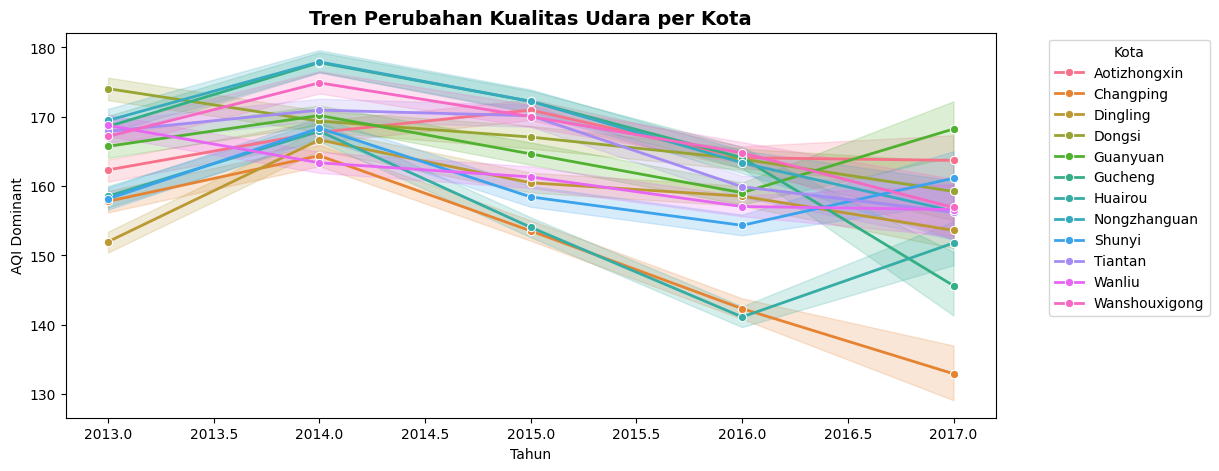

In [207]:
# Membuat plot untuk semua kota dalam satu visualisasi
plt.figure(figsize=(12, 5))
sns.lineplot(data=all_df, x='year', y='AQI_Dominant', hue='station', marker="o", linewidth=2)

# Menambahkan label dan legend
plt.xlabel("Tahun")
plt.ylabel("AQI Dominant")
plt.title("Tren Perubahan Kualitas Udara per Kota", fontsize=14, fontweight="bold")
plt.legend(title="Kota", bbox_to_anchor=(1.05, 1), loc="upper left")

# Menampilkan plot
plt.show()


**Insight:**
- Berdasarkan perhitungan, kota `Changping` sebagai kota dengan AQI terendah di tahun 2017.
- Tahun ***2014*** merupakan tahun dengan rata-rata AQI tertinggi dan tahun ***2016*** memiliki nilai AQI terendah.

### Pertanyaan 2: Bagaimana pengaruh parameter cuaca (suhu, tekanan udara, kelembaban, dan kecepatan angin) terhadap variasi kualitas udara (IQR AQI) di berbagai kota?

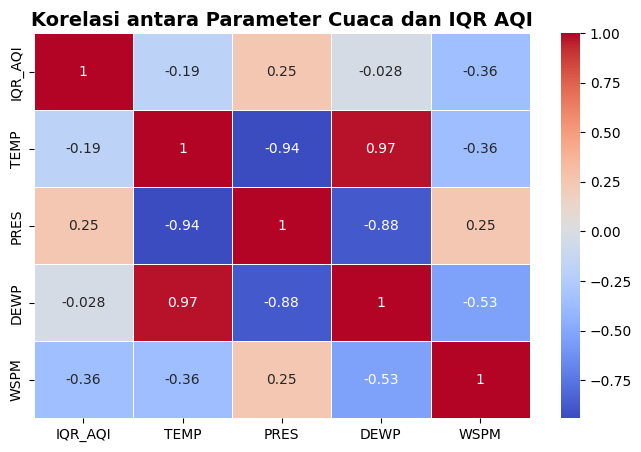

In [217]:
# Hitung IQR untuk AQI Dominant
def calculate_iqr(series):
    return np.percentile(series, 75) - np.percentile(series, 25)

# Hitung IQR AQI per bulan dan kota
iqr_data = all_df.groupby(["month", "station"]).agg(
    IQR_AQI=("AQI_Dominant", calculate_iqr),
    TEMP=("TEMP", "mean"),
    PRES=("PRES", "mean"),
    DEWP=("DEWP", "mean"),
    WSPM=("WSPM", "mean"),
    RAIN=("RAIN", "mean")
).reset_index()

plt.figure(figsize=(8, 5))
corr_matrix = iqr_data[["IQR_AQI", "TEMP", "PRES", "DEWP", "WSPM"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Korelasi antara Parameter Cuaca dan IQR AQI", fontsize=14, fontweight="bold")
plt.show()

**Insight:**
- Variabel-variabel parameter udara tidak berpengaruh terhadap nilai AQI karena memiliki korelasi pada rentang ***0.028*** hingga ***0.36***.
- Terlihat bahwa korelasi tinggi justru terlihat dari hubungan antar parameter, seperti `TEMP-PRES` dan `TEMP-DEWP`

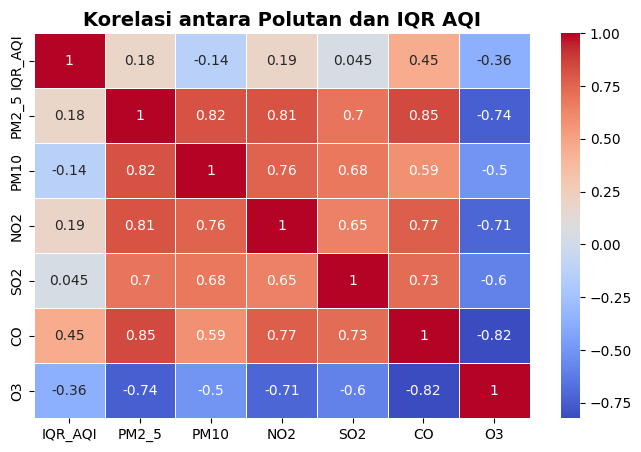

In [219]:
def calculate_iqr(series):
    return np.percentile(series, 75) - np.percentile(series, 25)

# Hitung IQR AQI per bulan dan kota serta rata-rata polutan
iqr_data = all_df.groupby(["month", "station"]).agg(
    IQR_AQI=("AQI_Dominant", calculate_iqr),
    PM2_5=("PM2.5", "mean"),
    PM10=("PM10", "mean"),
    NO2=("NO2", "mean"),
    SO2=("SO2", "mean"),
    CO=("CO", "mean"),
    O3=("O3", "mean")
).reset_index()

# Buat matriks korelasi hanya untuk polutan dan AQI
plt.figure(figsize=(8, 5))
corr_matrix = iqr_data[["IQR_AQI", "PM2_5", "PM10", "NO2", "SO2", "CO", "O3"]].corr()

# Visualisasi heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Korelasi antara Polutan dan IQR AQI", fontsize=14, fontweight="bold")
plt.show()


**Insight:**
- Atribut `CO` dan `O3` memiliki dampak terbesar terhadap AQI yang memengaruhi sangat berpengaruh terhadap kesehatan manusia
- tribut `SO2` paling tidak berpengaruh terhadap hasil AQI

## Analisis Lanjutan (Opsional)

### Clustering - Binning
**Definisi:** Teknik pengelompokan data dengan membagi nilai numerik ke dalam beberapa interval (bins) sebelum diterapkan ke algoritma clustering.

**Tujuan:**
- Mengurangi Noise → Mempermudah analisis dengan mengelompokkan nilai yang mirip.
- Meningkatkan Efisiensi → Mengurangi kompleksitas komputasi dalam clustering.
- Menyesuaikan Skala Data → Mengatasi data dengan distribusi yang tidak merata sebelum diterapkan algoritma clustering seperti K-Means atau DBSCAN.

C:\Users\Jihan Aurelia\AppData\Local\Temp\ipykernel_3308\3019160511.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aqi_category_counts.index, y=aqi_category_counts.values, palette=colors)
c:\Users\Jihan Aurelia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Jihan Aurelia\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data

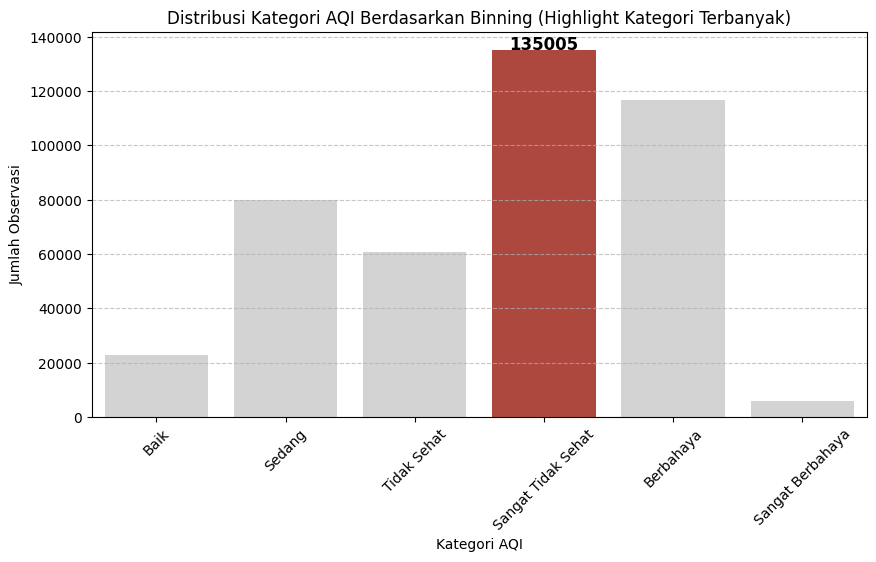

AQI_Category
Baik                   22758
Sedang                 79975
Tidak Sehat            60607
Sangat Tidak Sehat    135005
Berbahaya             116665
Sangat Berbahaya        5758
Name: count, dtype: int64

In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Binning pada dataset all_df berdasarkan tingkat AQI
aqi_bins = [0, 50, 100, 150, 200, 300, 500]
aqi_labels = ['Baik', 'Sedang', 'Tidak Sehat', 'Sangat Tidak Sehat', 'Berbahaya', 'Sangat Berbahaya']

# Melakukan binning pada AQI_Dominant
all_df['AQI_Category'] = pd.cut(all_df['AQI_Dominant'], bins=aqi_bins, labels=aqi_labels, include_lowest=True)

# Menghitung jumlah kategori AQI setelah binning
aqi_category_counts = all_df['AQI_Category'].value_counts().sort_index()

# Menentukan kategori dengan jumlah observasi terbanyak
max_category = aqi_category_counts.idxmax()

# Membuat palet warna dinamis (default abu-abu, kategori terbesar merah terang)
colors = ["#D3D3D3" if category != max_category else "#C0392B" for category in aqi_category_counts.index]

# Visualisasi distribusi kategori AQI
plt.figure(figsize=(10, 5))
sns.barplot(x=aqi_category_counts.index, y=aqi_category_counts.values, palette=colors)

# Formatting plot
plt.xlabel("Kategori AQI")
plt.ylabel("Jumlah Observasi")
plt.title("Distribusi Kategori AQI Berdasarkan Binning (Highlight Kategori Terbanyak)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tambahkan anotasi untuk kategori dengan jumlah terbanyak
for index, value in enumerate(aqi_category_counts):
    if aqi_category_counts.index[index] == max_category:
        plt.text(index, value + 100, f"{value}", ha='center', fontsize=12, fontweight='bold', color="black")

plt.show()

# Menampilkan jumlah kategori AQI dalam output
aqi_category_counts


## Conclusion

1. Bagaimana Tren Kualitas Udara Berubah Seiring Waktu di Berbagai Kota?
    - Dari hasil explanatory data analysis, terlihat tren penurunan AQI dalam kurun waktu 2014 hingga 2017. Ini menunjukkan bahwa kualitas udara secara umum mengalami perbaikan.
    - Beberapa kota mengalami perbaikan kualitas udara yang lebih signifikan dibandingkan kota lain, conyohnya `changping`, kemungkinan akibat kebijakan pengurangan emisi, peningkatan regulasi lingkungan, atau perubahan dalam aktivitas industri dan transportasi.
    - Ada pola musiman dalam perubahan kualitas udara, di mana AQI cenderung lebih tinggi di musim tertentu (misalnya musim dingin di beberapa daerah akibat pemanasan rumah tangga dan inversi suhu).
    - Berdasarkan visualisasi ***heatmap*** yang dilakukan, arah angin dan curah hujan tidak terlalu berpengaruh terhadap perubahan kualitas udara.

2. Bagaimana Kualitas Udara di Setiap Kota Memengaruhi Risiko Kesehatan Penduduk?
    - Ada banyak hari dalam setahun di mana AQI mencapai level “Tidak Sehat” atau lebih tinggi, terutama di kota-kota industri atau dengan tingkat kendaraan bermotor tinggi.
    - Ketika AQI berada di level yang lebih tinggi, risiko kesehatan meningkat, terutama bagi kelompok rentan seperti anak-anak, lansia, dan individu dengan penyakit pernapasan (asma, bronkitis, atau penyakit paru obstruktif kronis).
    - Polusi `CO` dan `O3` memiliki dampak terbesar terhadap kesehatan manusia, terutama karena jumlahnya yang sangat banyak kita temui sehari-hari di sekitar aktivitas kita.
    - Kota-kota dengan tingkat polusi tinggi mengalami peningkatan kasus penyakit pernapasan, penurunan harapan hidup, dan peningkatan biaya perawatan kesehatan akibat paparan jangka panjang terhadap udara yang tercemar.
